In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')  #mountingb

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Clara'

/content/gdrive/MyDrive/Clara


In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 27kB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 3.8MB 40.2MB/s 
     |████████████████████████████████| 512kB 38.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=08e577a05938615a9e363e2d755698db52e1d11dc6867b489bdd7daf8ff76b3e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [ ]:
import urllib.request
import tensorflow as tf
#import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
%cd models

/content/gdrive/My Drive/Clara/models


In [ ]:
ls

checkpoint                             model_final.ckpt.data-00000-of-00001
ckpt-1.data-00000-of-00001             model_final.ckpt.index
ckpt-1.index                           model_final.ckpt.meta
ckpt-2.data-00000-of-00001             model.fzn.pb
ckpt-2.index                           model.trt.pb
events.out.tfevents.1573364712.914461  my_test_model-1000.data-00000-of-00001
model.ckpt.data-00000-of-00001         my_test_model-1000.index
model.ckpt.index                       my_test_model-1000.meta
model.ckpt.meta                        output.txt


In [ ]:
with tf.Session() as sess:
  new_saver = tf.compat.v1.train.import_meta_graph('model.ckpt.meta')
  new_saver.restore(sess, 'model.ckpt')

INFO:tensorflow:Restoring parameters from model.ckpt


In [ ]:
sess = tf.Session()
op = sess.graph.get_operations()
[m.values() for m in op][1]

(<tf.Tensor 'TensorDataset:0' shape=() dtype=variant>,)

In [ ]:
 #Prepare to feed input, i.e. feed_dict and placeholders
w1 = tf.placeholder("float", name="w1")
w2 = tf.placeholder("float", name="w2")
b1= tf.Variable(2.0,name="bias")
feed_dict ={w1:4,w2:8}
 
#Define a test operation that we will restore
w3 = tf.add(w1,w2)
w4 = tf.multiply(w3,b1,name="op_to_restore")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
#Create a saver object which will save all the variables
saver = tf.train.Saver()
 
#Run the operation by feeding input
#print sess.run(w4,feed_dict)
#Prints 24 which is sum of (w1+w2)*b1 
 
#Now, save the graph
saver.save(sess, 'my_test_model',global_step=1000)

'my_test_model-1000'

In [ ]:
import tensorflow as tf
 
sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('my_test_model-1000.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))
 
 
# Now, let's access and create placeholders variables and
# create feed-dict to feed new data
 
graph = tf.get_default_graph()
w1 = graph.get_tensor_by_name("w1:0")
w2 = graph.get_tensor_by_name("w2:0")
feed_dict ={w1:13.0,w2:17.0}
 
#Now, access the op that you want to run. 
op_to_restore = graph.get_tensor_by_name("op_to_restore:0")
 
print(sess.run(op_to_restore,feed_dict))
#This will print 60 which is calculated 
#using new values of w1 and w2 and saved value of b1. 

INFO:tensorflow:Restoring parameters from ./my_test_model-1000
60.0


In [ ]:
ls

In [ ]:
saver = tf.train.import_meta_graph('my_test_model-1000.meta')
# Access the graph
graph = tf.get_default_graph()

In [ ]:
graph

In [ ]:
ls

checkpoint                             model_final.ckpt.data-00000-of-00001
ckpt-1.data-00000-of-00001             model_final.ckpt.index
ckpt-1.index                           model_final.ckpt.meta
ckpt-2.data-00000-of-00001             model.fzn.pb
ckpt-2.index                           model.trt.pb
events.out.tfevents.1573364712.914461  my_test_model-1000.data-00000-of-00001
model.ckpt.data-00000-of-00001         my_test_model-1000.index
model.ckpt.index                       my_test_model-1000.meta
model.ckpt.meta                        output.txt


In [ ]:
def analyze_inputs_outputs(graph):
    ops = graph.get_operations()
    outputs_set = set(ops)
    inputs = []
    for op in ops:
        if len(op.inputs) == 0 and op.type != 'Const':
            inputs.append(op)
        else:
            for input_tensor in op.inputs:
                if input_tensor.op in outputs_set:
                    outputs_set.remove(input_tensor.op)
    outputs = list(outputs_set)
    return (inputs, outputs)

In [ ]:
input, output = analyze_inputs_outputs(graph)

In [ ]:
for i in input:
  print(i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in output:
  print(i)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# gf = tf.GraphDef()
# gf.ParseFromString(open('model.fzn.pb','rb').read())

28803693

In [ ]:
# print([n.name + '=>' +  n.op for n in gf.node if n.op in ( 'Softmax','Placeholder')])

['NV_MODEL_INPUT=>Placeholder']


In [ ]:
def print_inputs(pb_filepath):
    with tf.gfile.GFile(pb_filepath, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

        with tf.Graph().as_default() as graph:
            tf.import_graph_def(graph_def, name='')

        input_list = []
        for op in graph.get_operations(): # tensorflow.python.framework.ops.Operation
            if op.type == "Placeholder":
                input_list.append(op.name)

        print('Inputs:', input_list)


def print_outputs(pb_filepath):
    with open(pb_filepath, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

        name_list = []
        input_list = []
        for node in graph_def.node: # tensorflow.core.framework.node_def_pb2.NodeDef
            name_list.append(node.name)
            input_list.extend(node.input)

        outputs = set(name_list) - set(input_list)
        print('Outputs:', list(outputs))

In [ ]:
print_inputs('model.trt.pb')

Inputs: ['NV_MODEL_INPUT']


In [ ]:

graph_def = graph.as_graph_def()
all_names = [n.name for n in graph_def.node]

print(all_names)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for i in all_names:
  print(i)

Streaming output truncated to the last 5000 lines.
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_6
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_6
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_6
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam_3
cond_1/Adam/update_conv5_12_x1_bn/beta/App

In [ ]:
ls

checkpoint                             model_final.ckpt.data-00000-of-00001
ckpt-1.data-00000-of-00001             model_final.ckpt.index
ckpt-1.index                           model_final.ckpt.meta
ckpt-2.data-00000-of-00001             model.fzn.pb
ckpt-2.index                           model.trt.pb
events.out.tfevents.1573364712.914461  my_test_model-1000.data-00000-of-00001
model.ckpt.data-00000-of-00001         my_test_model-1000.index
model.ckpt.index                       my_test_model-1000.meta
model.ckpt.meta                        output.txt


In [ ]:
def printTensors(pb_file):

    # read pb into graph_def
    with tf.gfile.GFile(pb_file, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # import graph_def
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def)

    # print operations
    for op in graph.get_operations():
        print(op.name)


printTensors("model.fzn.pb")

import/NV_MODEL_INPUT
import/NV_PLACEHOLDERDEFAULT_TRAINING
import/NV_IS_TRAINING
import/conv1/conv/kernel
import/conv1/conv/Conv2D/ReadVariableOp
import/conv1/conv/Conv2D
import/conv1/bn/gamma
import/conv1/bn/gamma/read
import/conv1/bn/beta
import/conv1/bn/beta/read
import/conv1/bn/moving_mean
import/conv1/bn/moving_mean/read
import/conv1/bn/moving_variance
import/conv1/bn/moving_variance/read
import/conv1/bn/cond/Switch
import/conv1/bn/cond/switch_t
import/conv1/bn/cond/pred_id
import/conv1/bn/cond/Const
import/conv1/bn/cond/Const_1
import/conv1/bn/cond/FusedBatchNormV3/Switch
import/conv1/bn/cond/FusedBatchNormV3/Switch_1
import/conv1/bn/cond/FusedBatchNormV3/Switch_2
import/conv1/bn/cond/FusedBatchNormV3
import/conv1/bn/cond/FusedBatchNormV3_1/Switch
import/conv1/bn/cond/FusedBatchNormV3_1/Switch_1
import/conv1/bn/cond/FusedBatchNormV3_1/Switch_2
import/conv1/bn/cond/FusedBatchNormV3_1/Switch_3
import/conv1/bn/cond/FusedBatchNormV3_1/Switch_4
import/conv1/bn/cond/FusedBatchNormV3_1

In [ ]:
for i in tf.get_default_graph().get_operations():
    print(i.name)

Streaming output truncated to the last 5000 lines.
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_6
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_11_x2_bn/beta/ApplyAdam_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_6
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_11_x2/kernel/ResourceApplyAdam_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_6
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_1_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_2_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam/Switch_3_3
cond_1/Adam/update_conv5_12_x1_bn/gamma/ApplyAdam_3
cond_1/Adam/update_conv5_12_x1_bn/beta/App

In [ ]:
input_operation = graph.get_operations()

In [ ]:
input_operation

[<tf.Operation 'normalize_tensors/component_0' type=Const>,
 <tf.Operation 'TensorDataset' type=TensorDataset>,
 <tf.Operation 'FlatMapDataset' type=FlatMapDataset>,
 <tf.Operation 'IteratorV2' type=IteratorV2>,
 <tf.Operation 'IteratorToStringHandle' type=IteratorToStringHandle>,
 <tf.Operation 'buffer_size' type=Const>,
 <tf.Operation 'seed' type=Const>,
 <tf.Operation 'seed2' type=Const>,
 <tf.Operation 'ShuffleDataset' type=ShuffleDataset>,
 <tf.Operation 'num_parallel_calls' type=Const>,
 <tf.Operation 'ParallelMapDataset' type=ParallelMapDataset>,
 <tf.Operation 'batch_size' type=Const>,
 <tf.Operation 'drop_remainder' type=Const>,
 <tf.Operation 'BatchDatasetV2' type=BatchDatasetV2>,
 <tf.Operation 'buffer_size_1' type=Const>,
 <tf.Operation 'PrefetchDataset' type=PrefetchDataset>,
 <tf.Operation 'count' type=Const>,
 <tf.Operation 'RepeatDataset' type=RepeatDataset>,
 <tf.Operation 'normalize_tensors_1/component_0' type=Const>,
 <tf.Operation 'TensorDataset_1' type=TensorDatase

In [ ]:
#!pip install tensorflow_hub==0.6.0


In [ ]:
#import tensorflow_hub as hub


In [ ]:
#module = hub.Module("https://tfhub.dev/nvidia/unet/industrial/class_1/1")

In [ ]:
#%cd '/content/gdrive/MyDrive/Clara/wget'

In [ ]:
#!wget --content-disposition https://api.ngc.nvidia.com/v2/models/nvidia/med/clara_xray_classification_chest_amp/versions/1/zip -O clara_xray_classification_chest_amp_1.zip

In [ ]:
#%cd '/content/gdrive/MyDrive/Clara/wget'

In [ ]:
ls

commands/  config/  docs/  models/  model.zip  resources/  test/  wget/


In [ ]:
#!unzip clara_xray_classification_chest_amp_1.zip


In [ ]:
#urllib.request.urlretrieve('https://api.ngc.nvidia.com/v2/models/nvidia/med/clara_xray_classification_chest_amp/versions/1/zip', 'model.zip')

In [ ]:
Model=tf.keras.applications.DenseNet121(
    include_top=True, weights=None, input_tensor=None,
    input_shape=(256,256,3), pooling=None, classes=15)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


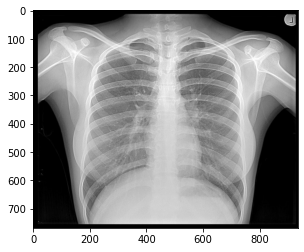

Cardiac Abnormality


In [ ]:
# img = keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Clara/test/Xray.jpg', target_size=(256, 256,3))
# CATEGORIES=['Nodule', 'Mass', 'Distortion of Pulmonary Architecture', 'Pleural Based Mass', 'Granuloma', 'Fluid in Pleural Space', 'Right Hilar Abnormality', 'Left Hilar Abnormality', 'Major Atelectasis', 'Infiltrate', 'Scarring', 'Pleural Fibrosis', 'Bone/Soft Tissue Lesion', 'Cardiac Abnormality', 'COPD']
# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) 
# pic=cv2.imread('/content/gdrive/MyDrive/Clara/test/Xray.jpg')
# plt.imshow(pic)
# plt.show()
# predictions = Model.predict(img_array)
# pred_name = CATEGORIES[np.argmax(predictions)]
# print(pred_name)

In [ ]:
latest = tf.train.latest_checkpoint('/content/gdrive/MyDrive/Clara/models')
latest

'/content/gdrive/MyDrive/Clara/models/ckpt-2'

In [ ]:
ls

checkpoint                             model.ckpt.index
ckpt-1.data-00000-of-00001             model.ckpt.meta
ckpt-1.index                           model_final.ckpt.data-00000-of-00001
ckpt-2.data-00000-of-00001             model_final.ckpt.index
ckpt-2.index                           model_final.ckpt.meta
events.out.tfevents.1573364712.914461  model.fzn.pb
model.ckpt.data-00000-of-00001         model.trt.pb


In [ ]:
Model.load_weights('/content/gdrive/MyDrive/Clara/models/ckpt-2')

AssertionError: ignored

In [ ]:
# def prediction(path):
#   img = keras.preprocessing.image.load_img(path, target_size=(256, 256,3))
#   CATEGORIES=['Nodule', 'Mass', 'Distortion of Pulmonary Architecture', 'Pleural Based Mass', 'Granuloma', 'Fluid in Pleural Space', 'Right Hilar Abnormality', 'Left Hilar Abnormality', 'Major Atelectasis', 'Infiltrate', 'Scarring', 'Pleural Fibrosis', 'Bone/Soft Tissue Lesion', 'Cardiac Abnormality', 'COPD']
#   img_array = keras.preprocessing.image.img_to_array(img)
#   img_array = tf.expand_dims(img_array, 0) 
#   pic=cv2.imread(path)
#   plt.imshow(pic)
#   plt.show()
#   predictions = Model.predict(img_array)
#   pred_name = CATEGORIES[np.argmax(predictions)]
#   print(pred_name)

In [ ]:
#prediction('/content/gdrive/MyDrive/Clara/test/Xray.jpg')

In [ ]:
# print('hello')

hello


In [ ]:
# import tensorflow as tf
# import os

# checkpoint_directory = "/content/gdrive/MyDrive/Clara/models"
# checkpoint_prefix = os.path.join(checkpoint_directory, "ckpt")

# # Create a Checkpoint that will manage two objects with trackable state,
# checkpoint = tf.train.Checkpoint(model=Model)
# status = checkpoint.restore(tf.train.latest_checkpoint(checkpoint_directory))
# checkpoint.save(file_prefix=checkpoint_prefix)

'/content/gdrive/MyDrive/Clara/models/ckpt-2'

In [ ]:
ls

commands/  config/  docs/  models/  model.zip  resources/  test/  wget/


In [ ]:
%cd 'wget'

/content/gdrive/My Drive/Clara/wget


In [ ]:
# with tf.Session() as sess:
#   new_saver = tf.train.import_meta_graph('model.ckpt.meta')
#   #new_saver.restore(sess, tf.train.latest_checkpoint(''))

In [ ]:
# model = tf.keras.models.load_model("/content/gdrive/MyDrive/Clara/wget/models/try")